In [1]:
import pathlib
import os
if not "changed_working_directory" in locals():
    changed_working_directory = True
    os.chdir(pathlib.Path().resolve().parent)
%load_ext autoreload
%autoreload 2

In [2]:
from tabGAN import TabGAN
from src import constants as const
import helpers
from v2_hp_tuning import fetch_hp_info

imports_path = "src//imports.ipynb"
tabGAN_path = "tabGAN.py"
utils_path = "utils\\utils.ipynb"
import helpers.hp_tuning

%run "$imports_path"

In [3]:
if const.dir.project() != os.getcwd():
    raise ValueError("Project directory not the same as in consts")

In [4]:
dataset_train_path = os.path.join(const.dir.data(), "df_adult_edited_train.csv")
dataset_test_path = os.path.join(const.dir.data(), "df_adult_edited_test.csv")

data_train = pd.read_csv(dataset_train_path)
data_test = pd.read_csv(dataset_test_path)
discrete_columns = data_train.columns[data_train.dtypes == "object"]

METHOD_NAME = "ctabGAN-qtr"

In [5]:
def plot_hp_tuning(hp_name, allow_not_complete_hp_vec=True, n_synthetic_datasets=None, **kwargs):
    hp_info = fetch_hp_info(method=METHOD_NAME, version=7)
    curr_image_dir = os.path.join(const.dir.images_hp_v7(), METHOD_NAME)
    curr_hp_info = hp_info[hp_name]
    if n_synthetic_datasets is None:
        n_synthetic_datasets = curr_hp_info["n_synthetic_datasets"]
    result = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
        data_train=data_train, 
        data_test=data_test,
        dataset_dir=const.dir.hp_tuning_v7(),
        hyperparams_vec=curr_hp_info["vec"],
        hyperparams_name = hp_name,
        hyperparams_subname = curr_hp_info["hyperparams_subname"],
        subfolder=METHOD_NAME,
        n_synthetic_datasets = n_synthetic_datasets,
        save_dir = const.dir.images_hp_v7(),
        save_path = f"predictive_performance_against_{hp_name}.svg",
        incl_comparison_folder=True,
        allow_not_complete_hp_vec=allow_not_complete_hp_vec,
        **kwargs
    )
    return result

  0%|          | 0/210 [00:00<?, ?it/s]

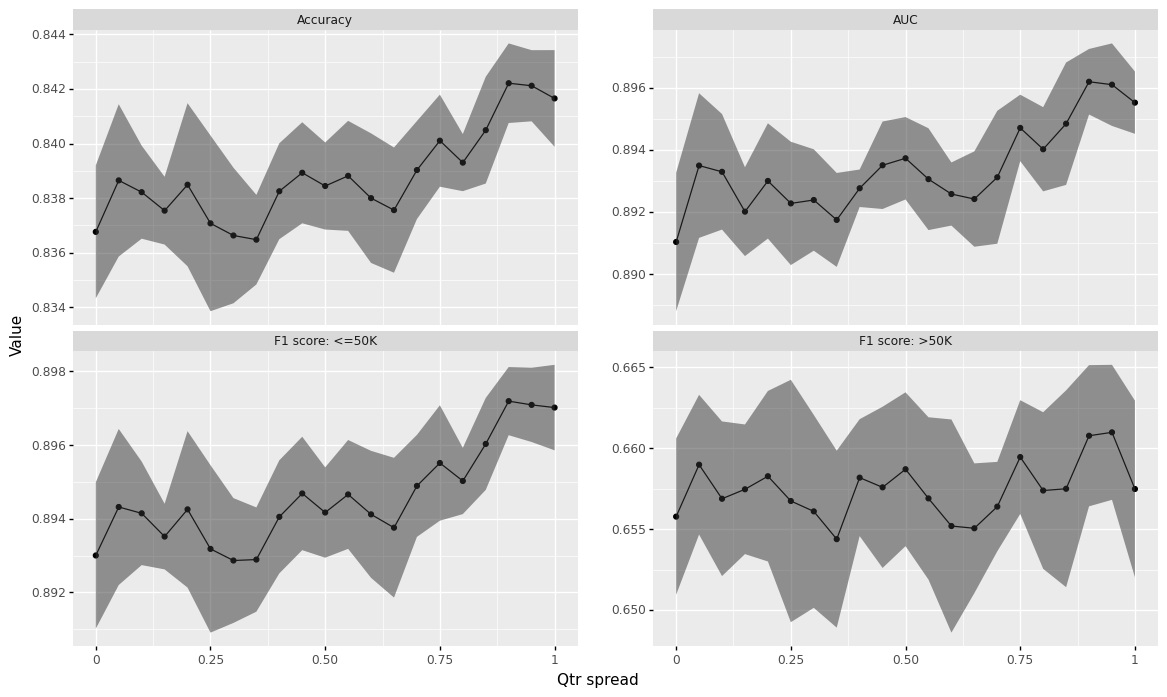

In [6]:
result_qtr_spread = plot_hp_tuning("qtr_spread")

In [7]:
result_qtr_spread

,Qtr spread,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00,0.836766,0.891039,0.774390,0.893004,0.655775,0.002434,0.002225,0.002690,0.001988,0.004829
1,0.05,0.838652,0.893495,0.776652,0.894321,0.658984,0.002790,0.002325,0.002925,0.002118,0.004317
2,0.10,0.838220,0.893294,0.775514,0.894149,0.656879,0.001704,0.001858,0.002464,0.001406,0.004779
3,0.15,0.837543,0.892014,0.775491,0.893518,0.657464,0.001242,0.001428,0.002172,0.000891,0.004006
4,0.20,0.838493,0.893001,0.776264,0.894256,0.658271,0.002987,0.001853,0.003578,0.002124,0.005269
5,0.25,0.837078,0.892279,0.774961,0.893183,0.656740,0.003218,0.001983,0.004517,0.002273,0.007491
6,0.30,0.836633,0.892388,0.774483,0.892867,0.656099,0.002484,0.001630,0.003618,0.001694,0.005962
7,0.35,0.836481,0.891748,0.773637,0.892893,0.654381,0.001641,0.001510,0.002681,0.001415,0.005468
8,0.40,0.838254,0.892765,0.776118,0.894053,0.658183,0.001756,0.000602,0.001822,0.001535,0.003612
9,0.45,0.838931,0.893505,0.776136,0.894688,0.657584,0.001851,0.001406,0.002561,0.001540,0.004982


  0%|          | 0/50 [00:00<?, ?it/s]

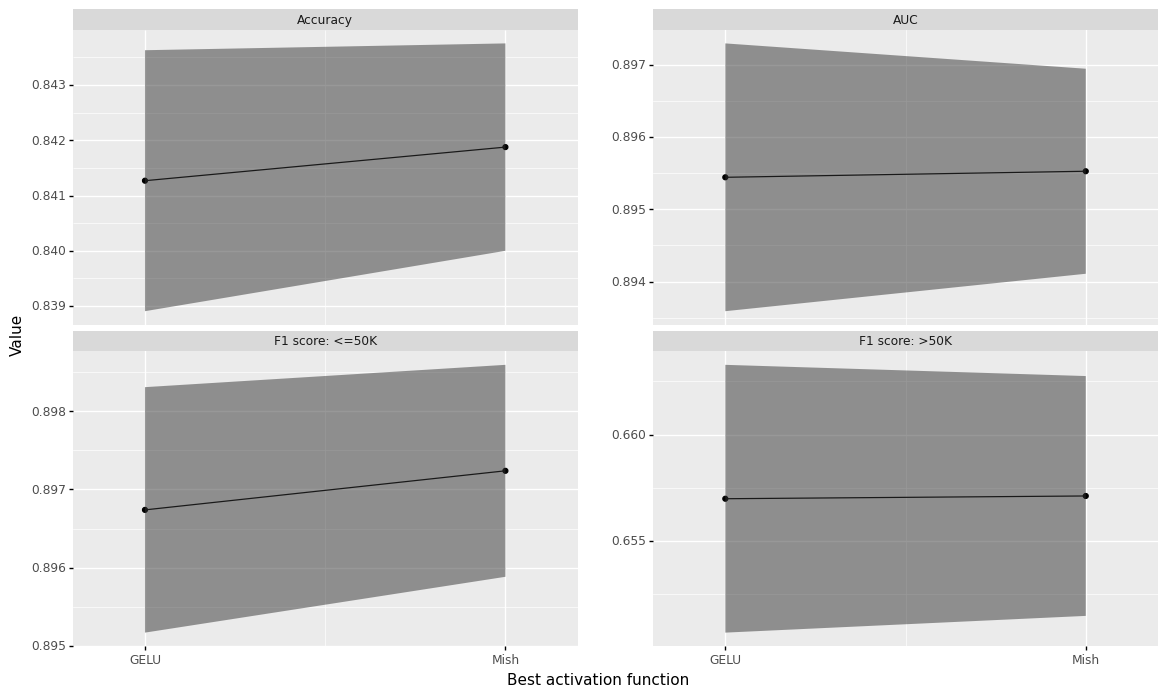

In [8]:
result_best_activation_function = plot_hp_tuning("best_activation_function")

In [9]:
result_best_activation_function

,Best activation function,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,GELU,0.841270,0.895442,0.776862,0.896739,0.656986,0.002362,0.001850,0.003718,0.001570,0.006292
1,Mish,0.841878,0.895526,0.777177,0.897239,0.657115,0.001877,0.001416,0.003091,0.001356,0.005635


  0%|          | 0/250 [00:00<?, ?it/s]

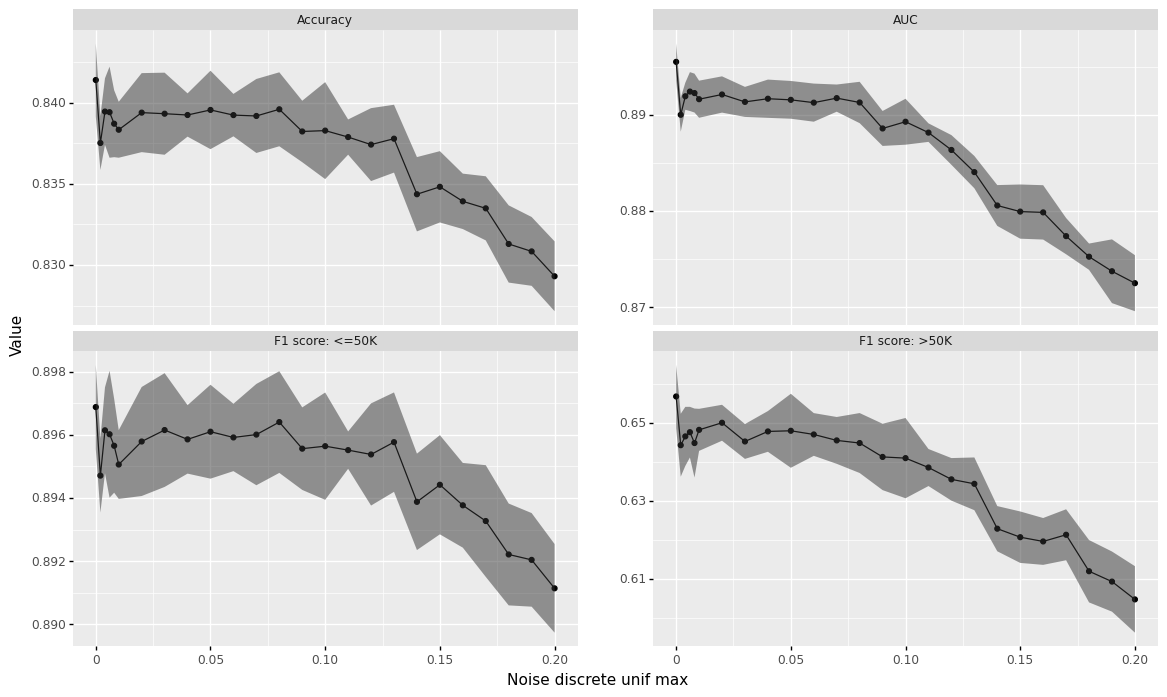

In [10]:
result_noise_discrete_unif_max = plot_hp_tuning("noise_discrete_unif_max")

  0%|          | 0/240 [00:00<?, ?it/s]

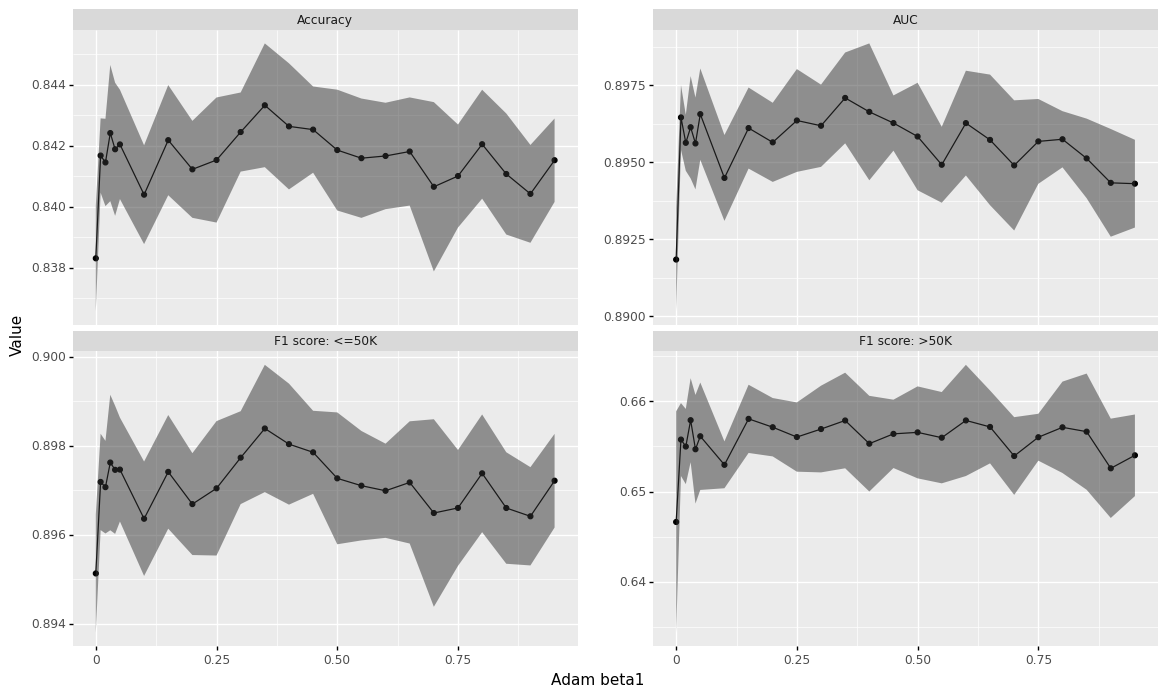

In [11]:
result_adam_beta1 = plot_hp_tuning("adam_beta1")

In [12]:
result_adam_beta1

,Adam beta1,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00001,0.838307,0.891838,0.770885,0.895130,0.646639,0.001731,0.001678,0.005973,0.001331,0.012238
1,0.01000,0.841673,0.896458,0.776471,0.897188,0.655755,0.001218,0.001050,0.001921,0.001083,0.004034
2,0.02000,0.841448,0.895633,0.776026,0.897070,0.654983,0.001431,0.000910,0.002288,0.001041,0.004158
3,0.03000,0.842410,0.896138,0.777761,0.897624,0.657898,0.002231,0.001663,0.002983,0.001523,0.004646
4,0.04000,0.841879,0.895611,0.776070,0.897460,0.654681,0.002179,0.001491,0.003520,0.001440,0.006010
5,0.05000,0.842039,0.896564,0.776793,0.897465,0.656121,0.001790,0.001484,0.003307,0.001168,0.005939
6,0.10000,0.840392,0.894491,0.774661,0.896360,0.652962,0.001618,0.001395,0.001590,0.001286,0.002592
7,0.15000,0.842178,0.896112,0.777730,0.897414,0.658046,0.001804,0.001317,0.002359,0.001278,0.003772
8,0.20000,0.841222,0.895648,0.776904,0.896689,0.657120,0.001588,0.001286,0.002014,0.001145,0.003228
9,0.25000,0.841527,0.896358,0.776538,0.897044,0.656032,0.002049,0.001670,0.002429,0.001511,0.003831


  0%|          | 0/200 [00:00<?, ?it/s]

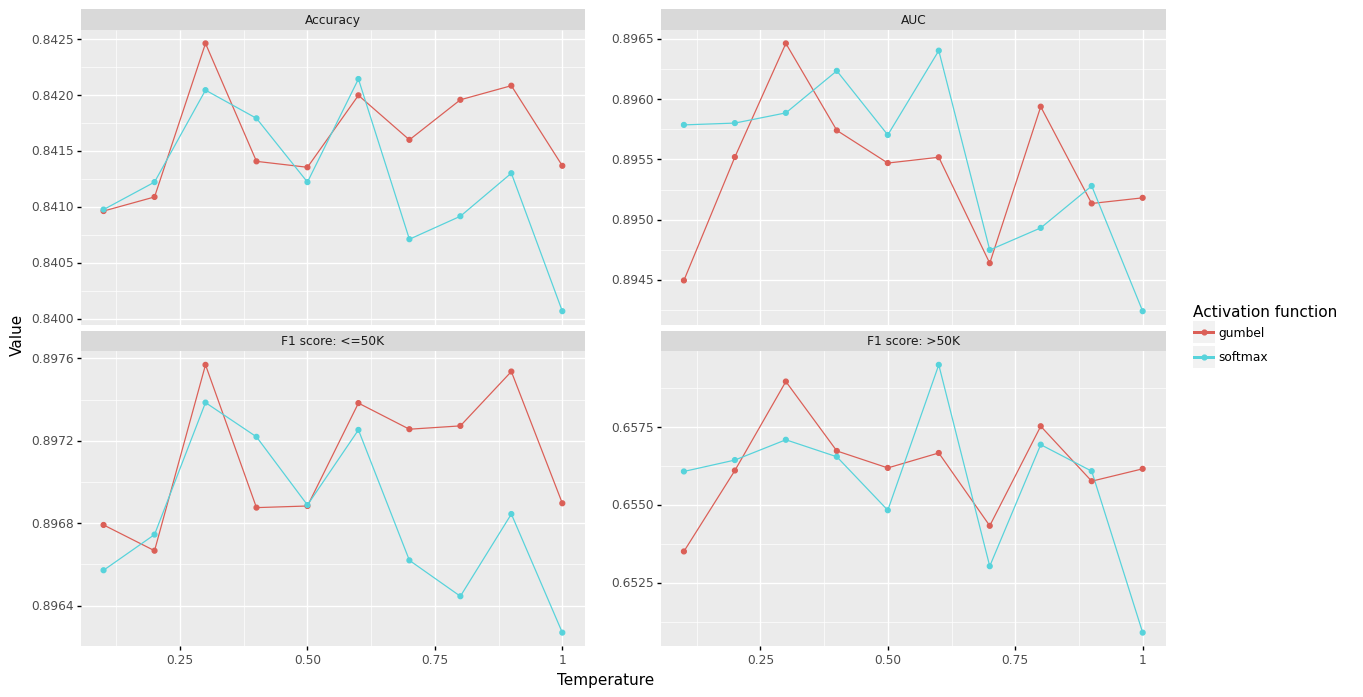

In [13]:
result_oh_encoding = plot_hp_tuning("oh_encoding")

In [14]:
result_oh_encoding

,Temperature,Activation function,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.1,gumbel,0.840963,0.894495,0.775151,0.896792,0.653511,0.001728,0.001315,0.002965,0.001176,0.005298
1,0.1,softmax,0.840976,0.895787,0.776327,0.896572,0.656083,0.001902,0.001178,0.003444,0.001235,0.006146
2,0.2,gumbel,0.841089,0.895520,0.776390,0.896667,0.656113,0.000719,0.000780,0.002141,0.000402,0.004177
3,0.2,softmax,0.841222,0.895802,0.776597,0.896745,0.656449,0.002615,0.001419,0.004605,0.001665,0.008018
4,0.3,gumbel,0.842463,0.896464,0.778271,0.897569,0.658974,0.001155,0.000661,0.002050,0.000914,0.004014
5,0.3,softmax,0.842045,0.895887,0.777243,0.897385,0.657101,0.002639,0.001939,0.003830,0.001769,0.006213
6,0.4,gumbel,0.841408,0.895741,0.776809,0.896876,0.656742,0.001770,0.000982,0.002428,0.001379,0.004453
7,0.4,softmax,0.841793,0.896236,0.776887,0.897219,0.656555,0.001219,0.000840,0.002697,0.000827,0.005151
8,0.5,gumbel,0.841355,0.895470,0.776540,0.896884,0.656196,0.001454,0.001009,0.001802,0.001121,0.003125
9,0.5,softmax,0.841222,0.895703,0.775862,0.896888,0.654835,0.001644,0.001454,0.003573,0.001071,0.006731


  0%|          | 0/30 [00:00<?, ?it/s]

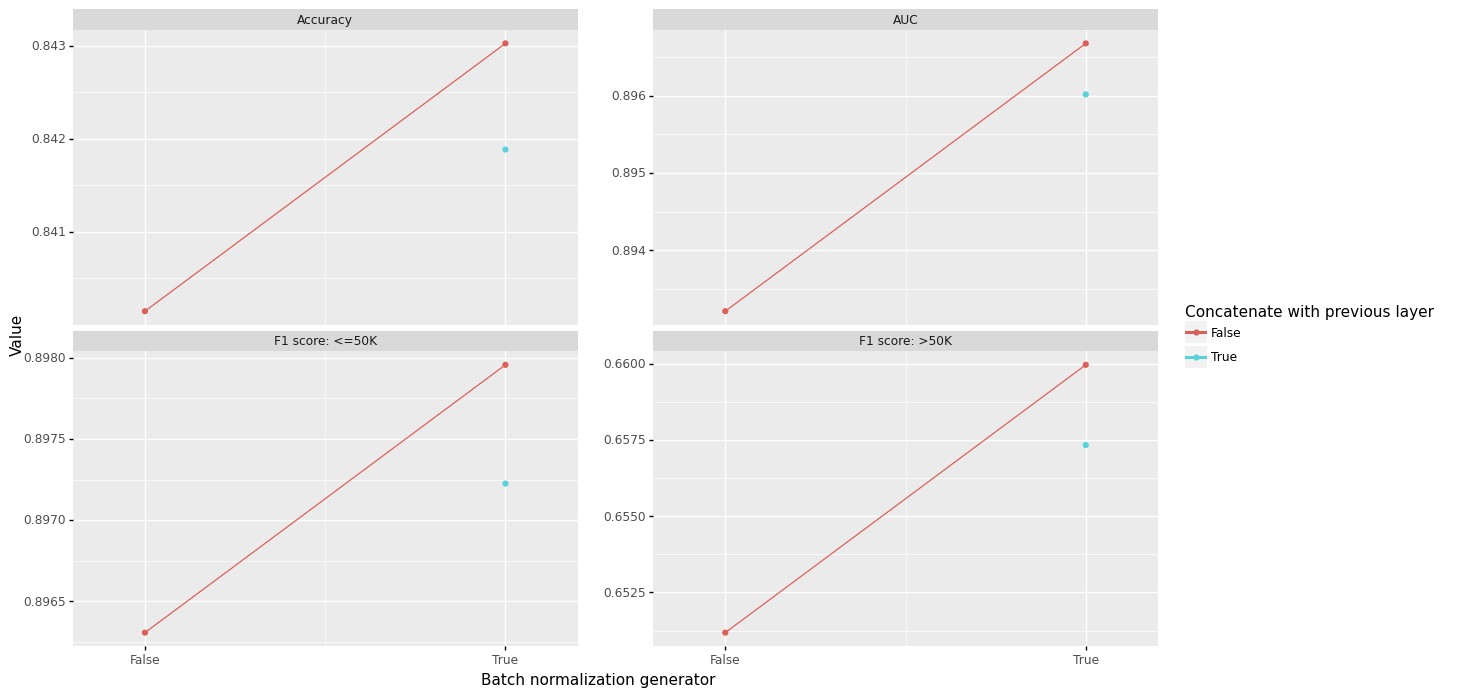

In [15]:
result_BN = plot_hp_tuning("BN", n_synthetic_datasets=10)

In [16]:
result_BN

,Batch normalization generator,Concatenate with previous layer,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,False,False,0.840146,0.893209,0.773745,0.896306,0.651184,0.001348,0.000802,0.003085,0.000988,0.006057
1,True,False,0.843028,0.896680,0.778958,0.897958,0.659958,0.001446,0.000949,0.001964,0.001137,0.003608
2,True,True,0.841886,0.896019,0.777277,0.897225,0.657330,0.001875,0.001485,0.002834,0.001447,0.005258


  0%|          | 0/60 [00:00<?, ?it/s]

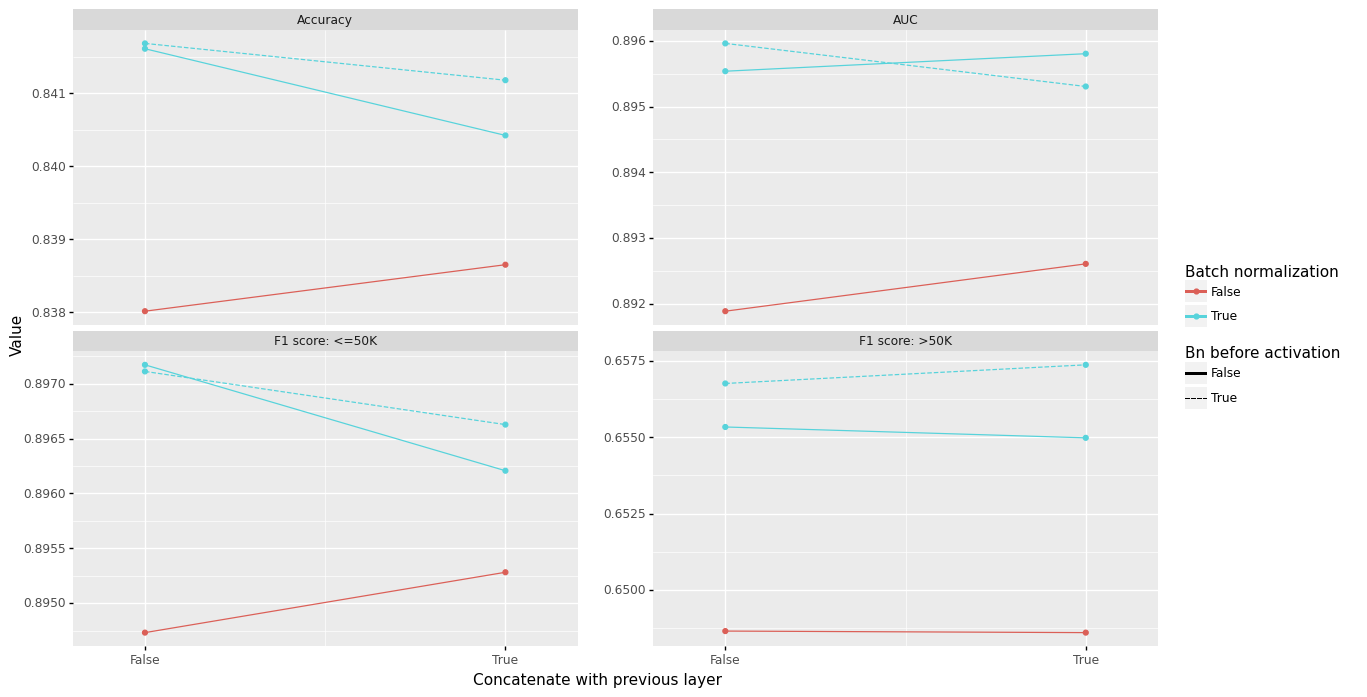

In [19]:
result_BN_advanced = plot_hp_tuning("BN_advanced")

In [18]:
result_BN_advanced

,Concatenate with previous layer,Batch normalization,Bn before activation,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,False,False,False,0.838015,0.891884,0.771690,0.894731,0.648649,0.001808,0.001026,0.003950,0.001269,0.007611
1,False,True,False,0.841614,0.895538,0.776256,0.897173,0.655339,0.002075,0.001588,0.003498,0.001479,0.006385
2,False,True,True,0.841687,0.895961,0.776939,0.897113,0.656765,0.001936,0.000884,0.002700,0.001360,0.004455
3,True,False,False,0.838652,0.892605,0.771940,0.895281,0.648598,0.001989,0.001317,0.002997,0.001398,0.005172
